In [1]:
%matplotlib widget
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyobs
import bison

# plt.rcParams.update({
#     "text.usetex"      : True,
#     "font.family"      : "Helvetica",
#     "mathtext.fontset" : "dejavuserif"
# })
plt.rcParams.update({
    "axes.axisbelow"   : True,
})

In [2]:
data = bison.load("WF_beta596_lat24^3x48_Ntraj1000-10_WFevol300-20_seed123457.dat")
print(data.keys())
print(data["History & Measurments"].keys())

[Bison] : Reading file WF_beta596_lat24^3x48_Ntraj1000-10_WFevol300-20_seed123457.dat
[Bison] : File created by gmorandi at ampere on Mon Dec  4 23:22:48 2023
[Bison] : Read 0.0406017 MB at 29.5243 MB/s
dict_keys(['beta coupling', 'Lattice size: L1', 'Lattice size: L2', 'Lattice size: L3', 'Lattice size: T', 'Lattice volume', 'Number of steps of OMF4 integrator', 'Length of each MD trajectory', 'Thermalization trajectories', 'MD trajectories', 'MC measure step', 'epsilon WF', 'WF evolutions from t = 0', 'WF measure step', 'History & Measurments', 'Avg. time in secs single traj.', 'Avg. time in secs WF(eps=0.01, evol=300) + Measurements'])
dict_keys(['Acc/Rej & dH', 'WF Energy density', 'WF Plaquette'])


In [6]:
##############################
### General run parameters ###
##############################
beta      =  data['beta coupling']
g2        =  6 / beta
L1        =  data['Lattice size: L1']
L2        =  data['Lattice size: L2']
L3        =  data['Lattice size: L3']
T         =  data['Lattice size: T']
V         =  data['Lattice volume']
D         =  4
Ns        =  data['Number of steps of OMF4 integrator']
tau       =  data['Length of each MD trajectory']
Ntherm    =  data['Thermalization trajectories']
Ntraj     =  data['MD trajectories']
MC_step   =  data['MC measure step']
eps_WF    =  data['epsilon WF']
WF_evol   =  data['WF evolutions from t = 0']
WF_step   =  data['WF measure step']
Nconf = Ntraj // MC_step
Nwf   = WF_evol // WF_step + 1



print(f"\n Lattice                =  [{L1}x{L2}x{L3}x{T}]")
print(f" Lattice volume         =  {V}")
print(f" beta                   =  {beta}")
print(f" Steps of OMF4          =  {Ns}")
print(f" tau MD                 =  {tau}")
print(f" Therm. trajectories    =  {Ntherm}")
print(f" MD trajectories        =  {Ntraj}")
print(f" MC interval between measurements  =  {MC_step}")
print(f" epsilon of Wilson Flow =  {eps_WF}")
print(f" Wilson Flow evolutions =  {WF_evol}")
print(f" Wilson Flow steps between measurements =  {WF_step}\n")

print(f" Measured flow times:")
print(*(f" t = {eps_WF * WF_step * i:.2f}" for i in range(Nwf)), sep='\n')

print(f"\n Avg. time single trajectory = {data['Avg. time in secs single traj.']/60:.2f} mins")
print(f" Avg. time WF + Measurements = {data[f'Avg. time in secs WF(eps={eps_WF}, evol={WF_evol}) + Measurements']/60:.2f} mins\n")


########################################################
### Loading history run and observables measurements ###
########################################################
history = data["History & Measurments"]['Acc/Rej & dH']
WF_EClov = data["History & Measurments"]['WF Energy density']
WF_Plaq  = data["History & Measurments"]['WF Plaquette']

print(f"\n Acceptance rate        =  {np.mean(history[:,0])*100:.0f} %")
print(f" < |dH| >               =  {np.mean(np.abs(history[:,1])):.2e}\n")


 Lattice                =  [24x24x24x48]
 Lattice volume         =  663552
 beta                   =  5.96
 Steps of OMF4          =  6
 tau MD                 =  2.0
 Therm. trajectories    =  200
 MD trajectories        =  1000
 MC interval between measurements  =  10
 epsilon of Wilson Flow =  0.01
 Wilson Flow evolutions =  300
 Wilson Flow steps between measurements =  20

 Measured flow times:
 t = 0.00
 t = 0.20
 t = 0.40
 t = 0.60
 t = 0.80
 t = 1.00
 t = 1.20
 t = 1.40
 t = 1.60
 t = 1.80
 t = 2.00
 t = 2.20
 t = 2.40
 t = 2.60
 t = 2.80
 t = 3.00

 Avg. time single trajectory = 0.54 mins
 Avg. time WF + Measurements = 15.53 mins


 Acceptance rate        =  84 %
 < |dH| >               =  3.39e-01



In [7]:
### Compute <E_Clov>_t and tau_int ###
t_WF = np.array([eps_WF * WF_step * i for i in range(Nwf)])
obsEClov = pyobs.observable(description=f'Energy Density at several WF times')
obsEClov.create('Ensemble A', WF_EClov.flatten(), shape=(Nwf,)) 

print(*(f"(t = {t_WF[i]:.2f}) :    <E_Clov> = {obsEClov[i]}                 tau_int = {obsEClov[i].tauint()['Ensemble A'][0][0]:.3f} +- \
{obsEClov[i].tauint()['Ensemble A'][1][0]:.3f}\n\n" for i in range(Nwf)), sep='')

(t = 0.00) :    <E_Clov> = 2.043704(63)
                 tau_int = 0.226 +- 0.064

(t = 0.20) :    <E_Clov> = 0.99144(19)
                 tau_int = 0.682 +- 0.236

(t = 0.40) :    <E_Clov> = 0.45982(22)
                 tau_int = 1.154 +- 0.516

(t = 0.60) :    <E_Clov> = 0.26347(20)
                 tau_int = 1.356 +- 0.607

(t = 0.80) :    <E_Clov> = 0.17626(20)
                 tau_int = 1.522 +- 0.746

(t = 1.00) :    <E_Clov> = 0.13006(19)
                 tau_int = 1.607 +- 0.787

(t = 1.20) :    <E_Clov> = 0.10233(18)
                 tau_int = 1.672 +- 0.819

(t = 1.40) :    <E_Clov> = 0.08415(18)
                 tau_int = 1.724 +- 0.845

(t = 1.60) :    <E_Clov> = 0.07145(18)
                 tau_int = 1.766 +- 0.865

(t = 1.80) :    <E_Clov> = 0.06215(17)
                 tau_int = 1.800 +- 0.882

(t = 2.00) :    <E_Clov> = 0.05507(16)
                 tau_int = 1.713 +- 0.906

(t = 2.20) :    <E_Clov> = 0.04953(16)
                 tau_int = 1.726 +- 0.914

(t = 2.40) :   

In [8]:
### Compute <Plaq>_t, <E_Plaq>_t and tau_int ###
obsPlaq = pyobs.observable(description=f'Plaquette at several WF times')
obsPlaq.create('Ensemble A', WF_Plaq.flatten(), shape=(Nwf,))
obsEPlaq = beta * (1.0 - obsPlaq) * D * (D-1) / 2

print(*(f"(t = {t_WF[i]:.2f}) :     <E_Plaq> = {obsEPlaq[i]}                  tau_int = {obsEPlaq[i].tauint()['Ensemble A'][0][0]:.3f} +- \
{obsEPlaq[i].tauint()['Ensemble A'][1][0]:.3f}\n\n" for i in range(Nwf)), sep='')

(t = 0.00) :     <E_Plaq> = 14.69212(76)
                  tau_int = 0.656 +- 0.227

(t = 0.20) :     <E_Plaq> = 2.93676(51)
                  tau_int = 0.600 +- 0.208

(t = 0.40) :     <E_Plaq> = 0.85874(35)
                  tau_int = 0.973 +- 0.389

(t = 0.60) :     <E_Plaq> = 0.38773(29)
                  tau_int = 1.323 +- 0.592

(t = 0.80) :     <E_Plaq> = 0.22985(25)
                  tau_int = 1.539 +- 0.754

(t = 1.00) :     <E_Plaq> = 0.15890(23)
                  tau_int = 1.638 +- 0.802

(t = 1.20) :     <E_Plaq> = 0.12025(22)
                  tau_int = 1.699 +- 0.832

(t = 1.40) :     <E_Plaq> = 0.09642(21)
                  tau_int = 1.746 +- 0.855

(t = 1.60) :     <E_Plaq> = 0.08043(20)
                  tau_int = 1.787 +- 0.876

(t = 1.80) :     <E_Plaq> = 0.06905(20)
                  tau_int = 1.822 +- 0.893

(t = 2.00) :     <E_Plaq> = 0.06058(18)
                  tau_int = 1.740 +- 0.921

(t = 2.20) :     <E_Plaq> = 0.05405(18)
                  tau_int = 1.756 +

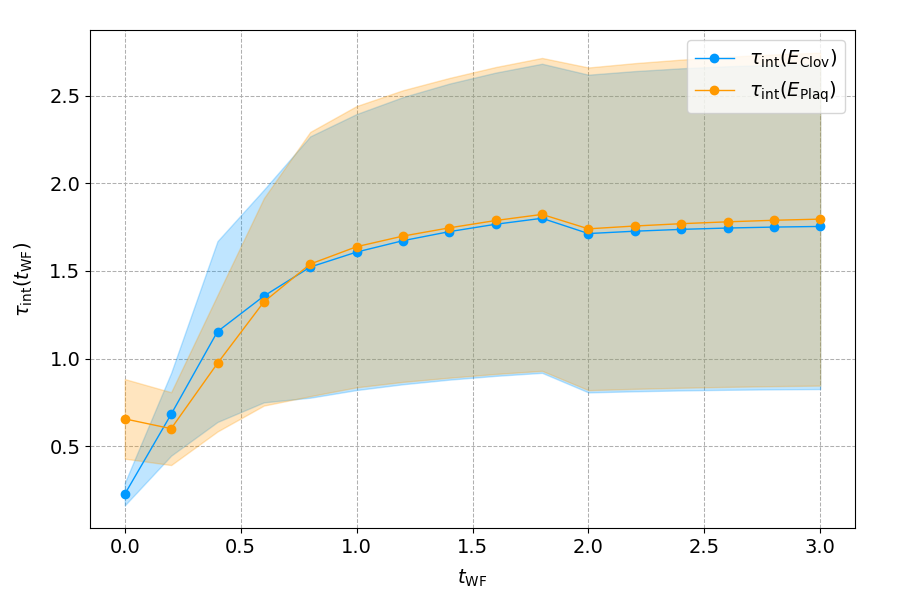

In [9]:
tau_EClov = np.array([np.squeeze(obsEClov[i].tauint()['Ensemble A'], axis=1) for i in range(Nwf)])
tau_EPlaq = np.array([np.squeeze(obsEPlaq[i].tauint()['Ensemble A'], axis=1) for i in range(Nwf)])


fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.10)
plt.subplots_adjust(right  = 0.95)

fsize = 14

ax.set_ylabel(r"$\tau_\mathrm{int}(t_\mathrm{WF})$", labelpad=10, rotation=90, fontsize=fsize)
ax.set_xlabel(r'$t_\mathrm{WF}$', labelpad=8, fontsize=fsize)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
#plt.xlim([-1, 50.5])
#plt.ylim([1e-2, 1e1])
ax.grid(linestyle = '--', linewidth = 0.75)

std = 1.0
ax.plot(t_WF, tau_EClov[:,0], label=r'$\tau_\mathrm{int}(E_\mathrm{Clov})$', linestyle='-', marker='o' , markersize=6.0, color='#0099ff', linewidth=1.0)
ax.fill_between(t_WF, tau_EClov[:,0] + std * tau_EClov[:,1], tau_EClov[:,0] - std * tau_EClov[:,1], alpha=.25, color='#0099ff')
ax.plot(t_WF, tau_EPlaq[:,0], label=r'$\tau_\mathrm{int}(E_\mathrm{Plaq})$', linestyle='-', marker='o' , markersize=6.0, color='#ff9900', linewidth=1.0)
ax.fill_between(t_WF, tau_EPlaq[:,0] + std * tau_EPlaq[:,1], tau_EPlaq[:,0] - std * tau_EPlaq[:,1], alpha=.25, color='#ff9900')

ax.legend(loc='best', fontsize=fsize)
#plt.savefig("tau_int.pdf")


In [10]:
### Compute t^2<E> for each t_WF ###
obs_t2EClov = (t_WF[1:]**2) * obsEClov[1:]
obs_t2EPlaq = (t_WF[1:]**2) * obsEPlaq[1:]
print("\n")
print(*(f"(t = {t_WF[i+1]:.2f}) :   t^2 <E_Clov> = {obs_t2EClov[i]}               t^2 <E_Plaq> = {obs_t2EPlaq[i]}\n" for i in range(WF_evol // WF_step)), sep='')



(t = 0.20) :   t^2 <E_Clov> = 0.0396576(74)
               t^2 <E_Plaq> = 0.117470(20)

(t = 0.40) :   t^2 <E_Clov> = 0.073571(34)
               t^2 <E_Plaq> = 0.137398(56)

(t = 0.60) :   t^2 <E_Clov> = 0.094849(73)
               t^2 <E_Plaq> = 0.13958(10)

(t = 0.80) :   t^2 <E_Clov> = 0.11281(13)
               t^2 <E_Plaq> = 0.14710(16)

(t = 1.00) :   t^2 <E_Clov> = 0.13006(19)
               t^2 <E_Plaq> = 0.15890(23)

(t = 1.20) :   t^2 <E_Clov> = 0.14735(27)
               t^2 <E_Plaq> = 0.17316(32)

(t = 1.40) :   t^2 <E_Clov> = 0.16493(35)
               t^2 <E_Plaq> = 0.18898(41)

(t = 1.60) :   t^2 <E_Clov> = 0.18292(45)
               t^2 <E_Plaq> = 0.20591(52)

(t = 1.80) :   t^2 <E_Clov> = 0.20137(55)
               t^2 <E_Plaq> = 0.22372(63)

(t = 2.00) :   t^2 <E_Clov> = 0.22030(65)
               t^2 <E_Plaq> = 0.24231(73)

(t = 2.20) :   t^2 <E_Clov> = 0.23971(76)
               t^2 <E_Plaq> = 0.26159(86)

(t = 2.40) :   t^2 <E_Clov> = 0.25961(88)
               

In [11]:
### Calculation of t_0 for both E_Clov and E_Plaq ###
eps = 0.04

x, dx = obs_t2EClov.error()
idx_x = np.squeeze(np.where((x < 0.3 + eps) & (x > 0.3 - eps)), axis=0)
print(f"\nE_Clov  :")
print(f"                  E_Clov  =  {x[idx_x]},") 
print(f"                  t_WF    =  {t_WF[idx_x+1]},\n") # recall t_WF starts from 0.0, whose corresponding value is not neither in obs_t2EClov nor in obs_t2EPlaq
interp_Clov = pyobs.interpolate(t_WF[idx_x+1], obs_t2EClov[idx_x])
print(f"                  interpolation  --->  t0 = {interp_Clov.solve(0.3, bracket=[t_WF[(idx_x+1)[0]], t_WF[(idx_x+1)[-1]]])}")
t0_EClov, dt0_EClov = np.squeeze(interp_Clov.solve(0.3, bracket=[t_WF[(idx_x+1)[0]], t_WF[(idx_x+1)[-1]]]).error(), axis=1)

y, dy = obs_t2EPlaq.error()
idx_y = np.squeeze(np.where((y < 0.3 + eps) & (y > 0.3 - eps)), axis=0)
print(f"E_Plaq  :")
print(f"                  E_Plaq  =  {y[idx_y]},") 
print(f"                  t_WF    =  {t_WF[idx_y+1]},\n")
interp_Plaq = pyobs.interpolate(t_WF[idx_y+1], obs_t2EPlaq[idx_y])
print(f"                  interpolation  --->  t0 = {interp_Plaq.solve(0.3, bracket=[t_WF[(idx_y+1)[0]], t_WF[(idx_y+1)[-1]]])}")
t0_EPlaq, dt0_EPlaq = np.squeeze(interp_Plaq.solve(0.3, bracket=[t_WF[(idx_y+1)[0]], t_WF[(idx_y+1)[-1]]]).error(), axis=1)


E_Clov  :
                  E_Clov  =  [0.27998647 0.30082916 0.32212896],
                  t_WF    =  [2.6 2.8 3. ],

                  interpolation  --->  t0 = 2.792(11)

E_Plaq  :
                  E_Plaq  =  [0.26158725 0.28150008 0.30200386 0.32306192],
                  t_WF    =  [2.2 2.4 2.6 2.8],

                  interpolation  --->  t0 = 2.581(11)



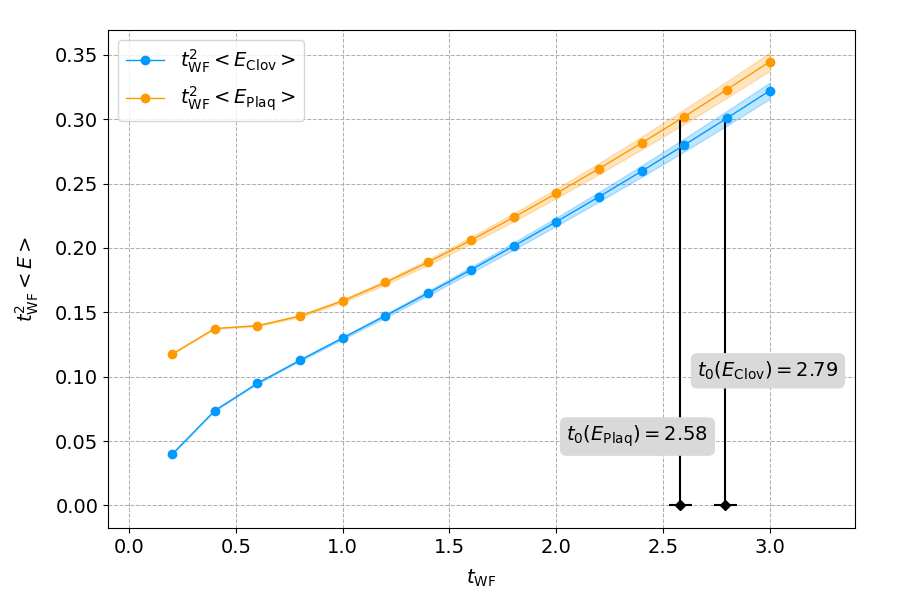

In [13]:
t2EClov = np.array([np.squeeze(obs_t2EClov[i].error(), axis=1) for i in range(WF_evol // WF_step)])
t2EPlaq = np.array([np.squeeze(obs_t2EPlaq[i].error(), axis=1) for i in range(WF_evol // WF_step)])

fig, ax = plt.subplots(figsize=(9, 6))
plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.12)
plt.subplots_adjust(left   = 0.12)
plt.subplots_adjust(right  = 0.95)

fsize = 14
std = 5.0
box = dict(boxstyle="round", color='#d9d9d9')

ax.set_ylabel(r"$t_\mathrm{WF}^2 <E>$", labelpad=10, rotation=90, fontsize=fsize)
ax.set_xlabel(r'$t_\mathrm{WF}$', labelpad=8, fontsize=fsize)

ax.vlines(x = t0_EClov, ymin = 0, ymax = 0.3, colors = 'black', linewidth=1.5)
#ax.scatter(t0_EClov, 0.0, color='black', marker='D', s=12.5)
ax.errorbar(t0_EClov, 0.0, xerr=std*dt0_EClov, color='black', marker='D', markersize=5)
ax.annotate(rf"$t_0(E_\mathrm{{Clov}}) = {t0_EClov:.2f}$", (t0_EClov, 0.10), xytext=(t0_EClov+0.2, 0.10), ha='center', bbox=box, fontsize=fsize)
ax.vlines(x = t0_EPlaq, ymin = 0, ymax = 0.3, colors = 'black', linewidth=1.5)
#ax.scatter(t0_EPlaq, 0.0, color='black', marker='D', s=12.5)
ax.errorbar(t0_EPlaq, 0.0, xerr=std*dt0_EPlaq, color='black', marker='D', markersize=5)
ax.annotate(rf"$t_0(E_\mathrm{{Plaq}}) = {t0_EPlaq:.2f}$", (t0_EPlaq, 0.10), xytext=(t0_EPlaq-0.2, 0.05), ha='center', bbox=box, fontsize=fsize)

plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.xlim([-0.1, 3.4])
#plt.ylim([1e-2, 1e1])
ax.grid(linestyle = '--', linewidth = 0.75)


ax.plot(t_WF[1:], t2EClov[:,0], label=r'$t_\mathrm{WF}^2 <E_\mathrm{Clov}>$', linestyle='-', marker='o' , markersize=6.0, color='#0099ff', linewidth=1.0)
ax.fill_between(t_WF[1:], t2EClov[:,0] + std * t2EClov[:,1], t2EClov[:,0] - std * t2EClov[:,1], alpha=.25, color='#0099ff')
ax.plot(t_WF[1:], t2EPlaq[:,0], label=r'$t_\mathrm{WF}^2 <E_\mathrm{Plaq}>$', linestyle='-', marker='o' , markersize=6.0, color='#ff9900', linewidth=1.0)
ax.fill_between(t_WF[1:], t2EPlaq[:,0] + std * t2EPlaq[:,1], t2EPlaq[:,0] - std * t2EPlaq[:,1], alpha=.25, color='#ff9900')

ax.legend(loc='best', fontsize=fsize)
#plt.savefig('t0E.pdf')


In [14]:
### Compute autocorrelation functions for each <E_Clov>_t and <E_Plaq>_t ###
gammaEClov = []
gammaEPlaq = []
for i in range(Nwf): 
    norm, gamma = obsEClov[i].delta['Ensemble A:0'].gamma(Nconf, 0)
    gamma = gamma / norm
    gammaEClov.append(gamma)
    norm, gamma = obsEPlaq[i].delta['Ensemble A:0'].gamma(Nconf, 0)
    gamma = gamma / norm
    gammaEPlaq.append(gamma)

gammaEClov = np.array(gammaEClov)
gammaEPlaq = np.array(gammaEPlaq)

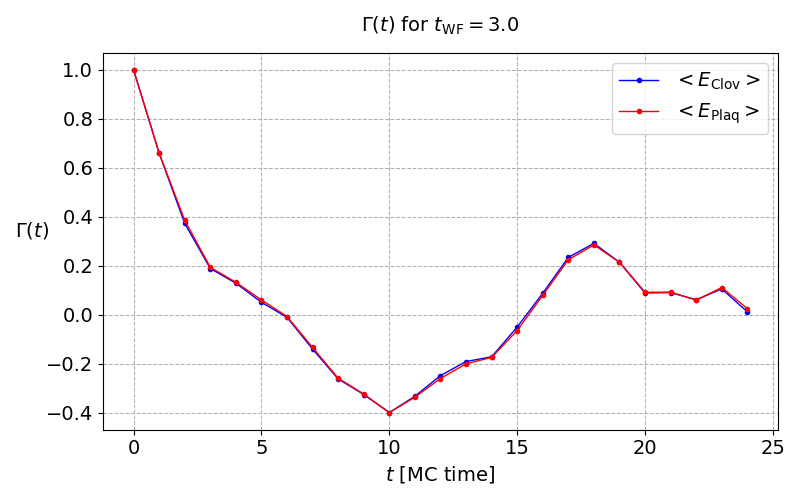

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.subplots_adjust(top    = 0.95)
plt.subplots_adjust(bottom = 0.05)
plt.subplots_adjust(left   = 0.05)
plt.subplots_adjust(right  = 0.95)
fsize = 14

tmax = Nconf // 4
t = 3.0
i = int(t / (eps_WF * WF_step)) 

plt.title(rf'$\Gamma(t)$ for $t_\mathrm{{WF}}={t}$', pad=15, fontsize=fsize)

ax.plot(np.arange(tmax), gammaEClov[i,:tmax]/gammaEClov[i,0], color='blue', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=3.0,   label=rf'$<E_\mathrm{{Clov}}>$')
ax.plot(np.arange(tmax), gammaEPlaq[i,:tmax]/gammaEPlaq[i,0], color='red', \
        marker='o',     linestyle='-',       linewidth='1.0', \
        markersize=3.0,   label=rf'$<E_\mathrm{{Plaq}}>$')
ax.set_xlabel(r'$t$ [MC time]', fontsize=fsize)
ax.set_ylabel(r'$\Gamma(t)$', rotation=0, labelpad=10, fontsize=fsize)
ax.legend(loc='best', fontsize=fsize)


plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
#plt.xlim([-0.1, 10])
#plt.ylim([1e-2, 1e1])
#ax.set_yscale('log', base=10)
#ax.set_xscale('log', base=10)
ax.grid(linestyle = '--', linewidth = 0.75)

fig.tight_layout()
